In [30]:
#%pip install xlrd >= 1.0.0

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import seaborn as sns

### Leer archivo de la base de datos

In [32]:
data_original = pd.read_excel("http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls", sheet_name="IMM_2020")

In [33]:
data_original.head(20)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042
5,1,Aguascalientes,1006,Pabellón de Arteaga,47646,2.732339,25.724280,0.541338,0.425487,1.044760,0.705635,19.075954,32.764555,64.335011,58.624768,Muy bajo,0.917982
6,1,Aguascalientes,1007,Rincón de Romos,57369,3.445917,27.094343,0.965870,0.501341,1.027223,1.302663,20.975502,44.285241,76.643972,57.646671,Muy bajo,0.902667
7,1,Aguascalientes,1008,San José de Gracia,9552,2.439773,28.419940,2.107139,0.922529,1.708775,0.859629,21.572750,41.300251,75.410936,57.527531,Muy bajo,0.900801
8,1,Aguascalientes,1009,Tepezalá,22485,4.235219,35.086278,1.385042,0.585292,1.085694,1.429720,22.985739,76.762286,76.943557,56.604314,Muy bajo,0.886345
9,1,Aguascalientes,1010,El Llano,20853,3.898421,34.757713,2.321131,1.030523,1.781333,1.452547,21.816786,69.754951,76.336092,56.555794,Muy bajo,0.885585


In [34]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CVE_ENT   2469 non-null   int64  
 1   NOM_ENT   2469 non-null   object 
 2   CVE_MUN   2469 non-null   int64  
 3   NOM_MUN   2469 non-null   object 
 4   POB_TOT   2469 non-null   int64  
 5   ANALF     2469 non-null   float64
 6   SBASC     2469 non-null   float64
 7   OVSDE     2469 non-null   float64
 8   OVSEE     2469 non-null   float64
 9   OVSAE     2469 non-null   float64
 10  OVPT      2469 non-null   float64
 11  VHAC      2469 non-null   float64
 12  PL.5000   2469 non-null   float64
 13  PO2SM     2469 non-null   float64
 14  IM_2020   2469 non-null   float64
 15  GM_2020   2469 non-null   object 
 16  IMN_2020  2469 non-null   float64
dtypes: float64(11), int64(3), object(3)
memory usage: 328.0+ KB


### Descripción del Dataframe

Estadísticas descriptivas para variables númericas

In [35]:
data_original.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


Estadísticas descriptivas para variable categóricas 

In [36]:
data_original.describe(include=object)

,NOM_ENT,NOM_MUN,GM_2020
count,2469,2469,2469
unique,32,2328,5
top,Oaxaca,Benito Juárez,Muy bajo
freq,570,7,655


### Gráficas

**Gráfica que permite ver el porcentaje de municipios por estado con índices de marginalización "muy bajo", "bajo", "medio", "alto" y "muy alto". Y guardar la gráfica en archivo png.**

In [37]:
# Leer diccionario
diccionario = pd.read_excel('http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls', sheet_name='Diccionario', header=2)

In [38]:
diccionario.head(17)

,Variable,Descripción
0,CVE_ENT,Clave de entidad federativa
1,NOM_ENT,Nombre de entidad federativa
2,CVE_MUN,Clave del municipio
3,NOM_MUN,Nombre del municipio
4,POB_TOT,Población total
5,ANALF,Porcentaje de población analfabeta de 15 años o más
6,SBASC,Porcentaje de población de 15 años o más sin educación básica
7,OVSDE,Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado
8,OVSEE,Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica
9,OVSAE,Porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada


In [39]:
# Dataframe con el conteo de grado de marginación por municipio y entidad

df_1_names_flat = data_original[['NOM_ENT', 'NOM_MUN', 'GM_2020']].groupby(['NOM_ENT', 'GM_2020']).nunique().reset_index()
df_1_names_flat.head(10)

,NOM_ENT,GM_2020,NOM_MUN
0,Aguascalientes,Muy bajo,11
1,Baja California,Medio,1
2,Baja California,Muy bajo,5
3,Baja California Sur,Muy bajo,5
4,Campeche,Alto,2
5,Campeche,Bajo,6
6,Campeche,Medio,2
7,Campeche,Muy bajo,2
8,Chiapas,Alto,66
9,Chiapas,Bajo,7


In [40]:
# Dataframe con el conteo total de municipipos por estado

# data_original[['NOM_ENT']].value_counts(ascending=True)
count_mun = df_1_names_flat.groupby('NOM_ENT').NOM_MUN.sum()
count_mun = pd.DataFrame(count_mun).reset_index()
count_mun.rename(columns={'NOM_MUN':'CONT_TOT_MUN'}, inplace=True)
#count_mun

In [41]:
# Dataframe con el porcentaje de municipios por entidad

df_merge = df_1_names_flat.merge(count_mun, on="NOM_ENT", how="left")
df_merge['PORCENT_MUN'] = (100 * df_merge['NOM_MUN'] / df_merge['CONT_TOT_MUN'])
df_merge

,NOM_ENT,GM_2020,NOM_MUN,CONT_TOT_MUN,PORCENT_MUN
0,Aguascalientes,Muy bajo,11,11,100.000000
1,Baja California,Medio,1,6,16.666667
2,Baja California,Muy bajo,5,6,83.333333
3,Baja California Sur,Muy bajo,5,5,100.000000
4,Campeche,Alto,2,12,16.666667
...,...,...,...,...,...
118,Yucatán,Muy bajo,7,106,6.603774
119,Zacatecas,Alto,2,58,3.448276
120,Zacatecas,Bajo,28,58,48.275862
121,Zacatecas,Medio,5,58,8.620690


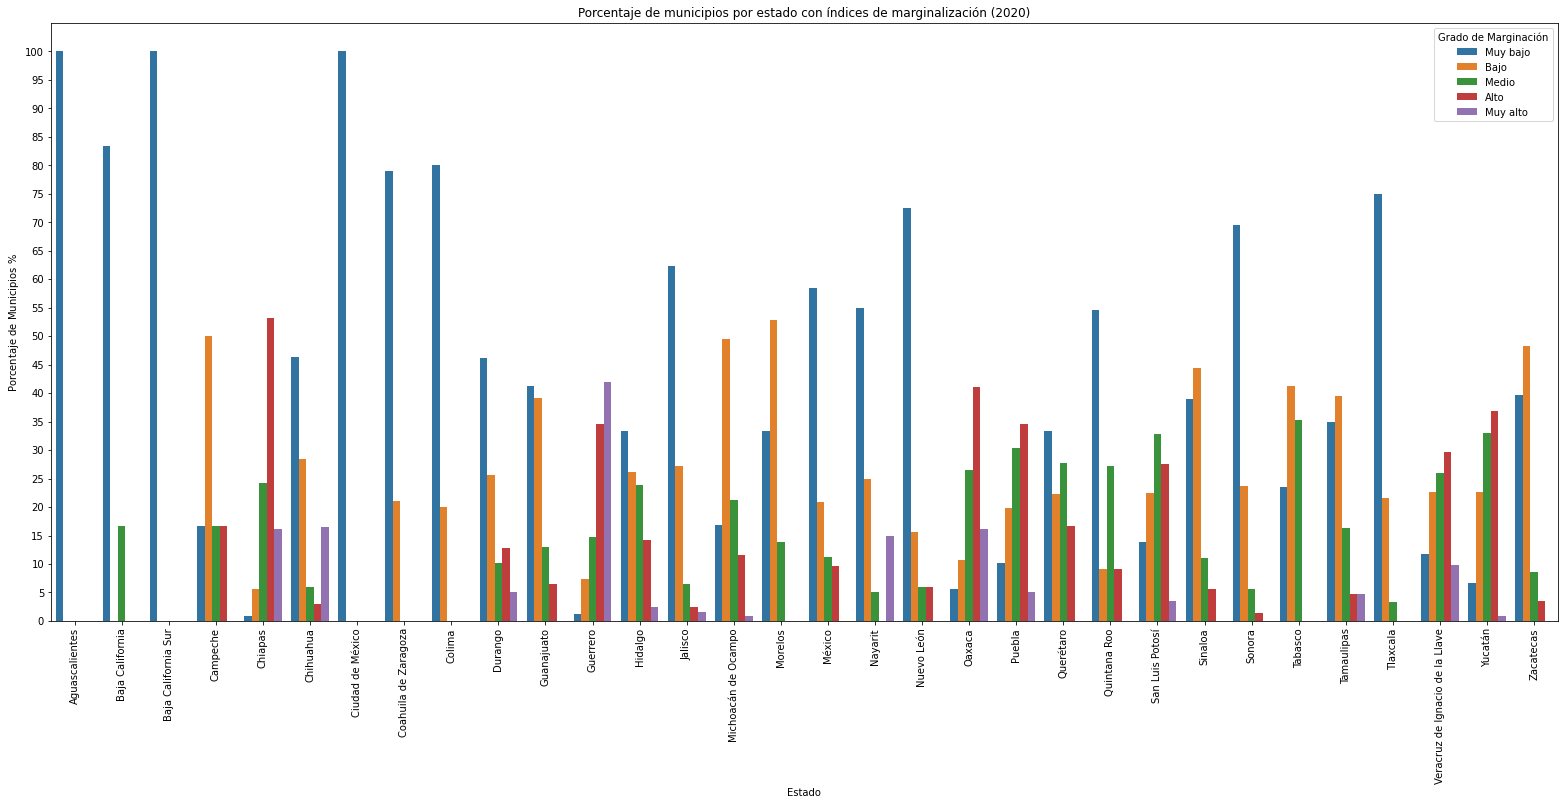

In [42]:
plt.figure(figsize=(27,11))
ax = sns.barplot(x=df_merge['NOM_ENT'], y=df_merge['PORCENT_MUN'], hue=df_merge['GM_2020'], hue_order=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])#, dodge=False)

# for label in ax.containers:
#     ax.bar_label(label)

plt.xlabel('Estado')
plt.ylabel(r'Porcentaje de Municipios $\%$')
plt.title('Porcentaje de municipios por estado con índices de marginalización (2020)')
plt.legend(title='Grado de Marginación')
plt.yticks(range(0,101, 5))
plt.xticks(rotation=90)
plt.savefig('Porcentaje de municipios.png', facecolor='white', transparent=False) # Guardar plot
plt.show()

**Realizar una gráfica que muestre el porcentaje de la población, respecto a la población total de cada estado, con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en formato jpg**

In [43]:
# Dataframe con cantidad de habitantes por entidad y grado de marginación
df_2 = data_original[['NOM_ENT', 'GM_2020', 'POB_TOT']].groupby(['NOM_ENT', 'GM_2020']).POB_TOT.sum().reset_index()
df_2 = pd.DataFrame(df_2)
df_2.head(20)

,NOM_ENT,GM_2020,POB_TOT
0,Aguascalientes,Muy bajo,1425607
1,Baja California,Medio,117568
2,Baja California,Muy bajo,3651452
3,Baja California Sur,Muy bajo,798447
4,Campeche,Alto,78627
5,Campeche,Bajo,255991
6,Campeche,Medio,50823
7,Campeche,Muy bajo,542922
8,Chiapas,Alto,1720632
9,Chiapas,Bajo,998167


In [44]:
# Dataframe con conteo de habitantes por entidad
df_2_cont = data_original[['NOM_ENT', 'POB_TOT']].groupby('NOM_ENT').sum()
df_2_cont.rename(columns={'POB_TOT': 'POB_TOT_ENT'}, inplace=True)
df_2_cont.head(15)

,POB_TOT_ENT
NOM_ENT,
Aguascalientes,1425607
Baja California,3769020
Baja California Sur,798447
Campeche,928363
Chiapas,5543828
Chihuahua,3741869
Ciudad de México,9209944
Coahuila de Zaragoza,3146771
Colima,731391


In [45]:
# Dataframe con población total por entidad y por indice de marginación. Contiene porcentaje correspondiente
df_2_merge = df_2.merge(df_2_cont, how='left', on='NOM_ENT')

df_2_merge['PORC_GM_POB_ENT'] = (100 * df_2_merge['POB_TOT'] / df_2_merge['POB_TOT_ENT'])

df_2_merge.head(20)

,NOM_ENT,GM_2020,POB_TOT,POB_TOT_ENT,PORC_GM_POB_ENT
0,Aguascalientes,Muy bajo,1425607,1425607,100.000000
1,Baja California,Medio,117568,3769020,3.119325
2,Baja California,Muy bajo,3651452,3769020,96.880675
3,Baja California Sur,Muy bajo,798447,798447,100.000000
4,Campeche,Alto,78627,928363,8.469424
5,Campeche,Bajo,255991,928363,27.574451
6,Campeche,Medio,50823,928363,5.474475
7,Campeche,Muy bajo,542922,928363,58.481650
8,Chiapas,Alto,1720632,5543828,31.036894
9,Chiapas,Bajo,998167,5543828,18.005014


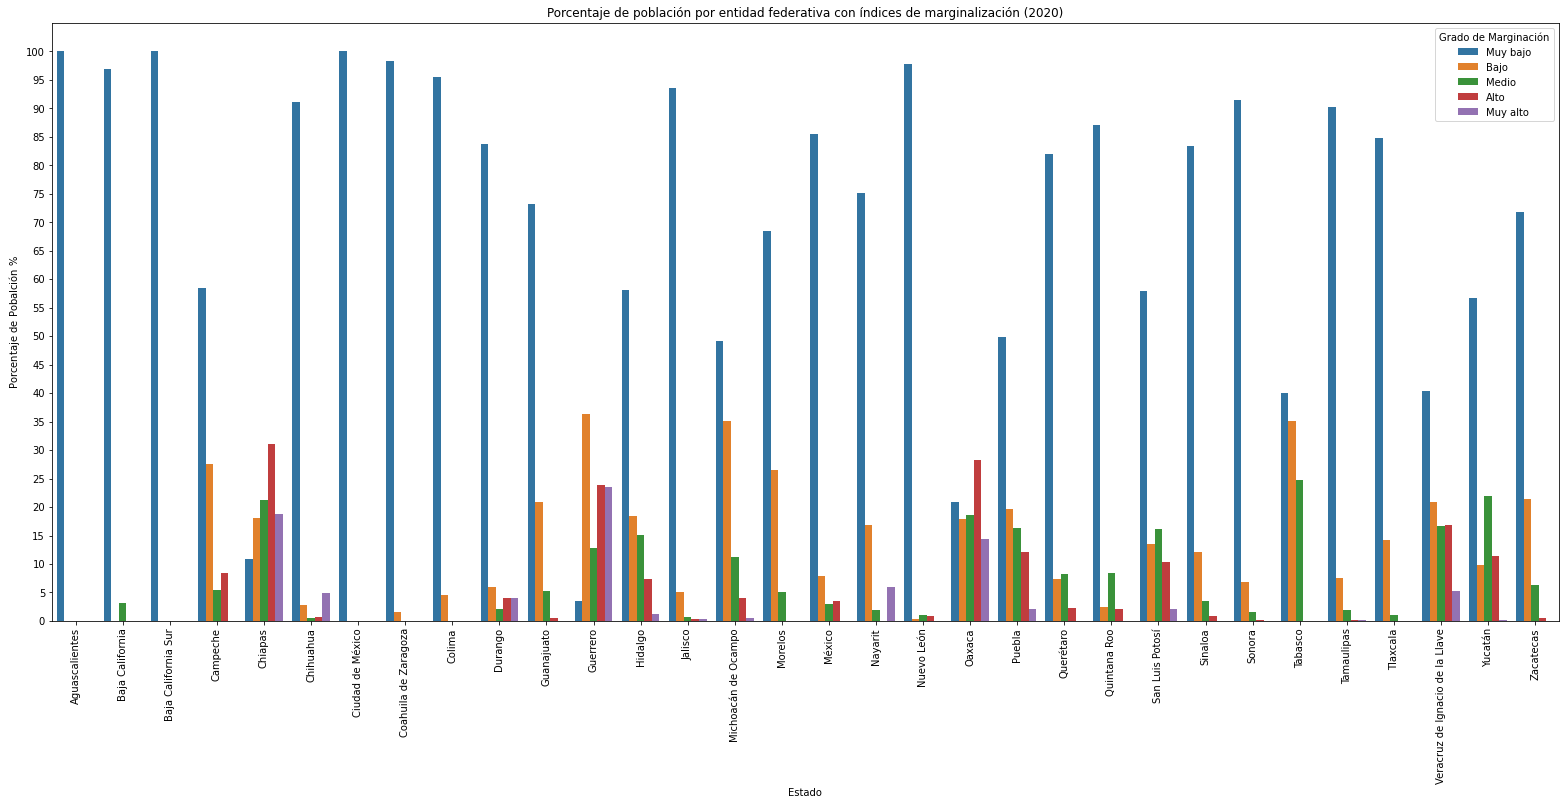

In [46]:
plt.figure(figsize=(27,11))
ax = sns.barplot(x=df_2_merge['NOM_ENT'], y=df_2_merge['PORC_GM_POB_ENT'], hue=df_2_merge['GM_2020'], hue_order=['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])#, dodge=False)

# for label in ax.containers:
#     ax.bar_label(label)

plt.xlabel('Estado')
plt.ylabel(r'Porcentaje de Pobalción $\%$')
plt.title('Porcentaje de población por entidad federativa con índices de marginalización (2020)')
plt.legend(title='Grado de Marginación')
plt.yticks(range(0,101, 5))
plt.xticks(rotation=90)
plt.savefig('Porcentaje de población por entidad.jpg', facecolor='white', transparent=False) # Guardar plot
plt.show()

**¿Hay coincidencias entra la gráficas anteriores?  ¿Algún hallazgo? Comenta tu análisis.**

Sí hay coincidencias, con la primera grafica se pueden ver indicios de un grado de marginación 'Muy bajo' en la mayoría de municipios (barras azules), pero no es tan notorio o marcado, es decir, por el momento se puede decir que el grado de marginación 'Muy bajo' e incluso 'Bajo' en México es común. 

La segunda gráfica hace notar aún más el grado de marginación 'Muy bajo' en México, donde el porcentaje de la población de cada estado (indicado por el índice) refleja que solo en 3 estados NO predomina el grado de marginación 'Muy bajo'. 

En la primera gráfica entidades como Puebla, Yucatán o San Luis Potosí, no tenían un índice predominante 'Muy bajo', pero en la segunda gráfica estos estados cambian drásticamente su índice predominante. Los grados alto y muy alto no predominan en la gran mayoria de municipios y por población.

**Grafica la relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5.000 habitantes.**

In [47]:
df_3 = data_original[['ANALF', 'PL.5000']] # ['NOM_ENT', 'NOM_MUN', 'POB_TOT', 'ANALF', 'PL.5000']
df_3['REL'] = df_3['ANALF'] / df_3['PL.5000']

C:\Users\ricar\AppData\Local\Temp\ipykernel_9472\4097377057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['REL'] = df_3['ANALF'] / df_3['PL.5000']


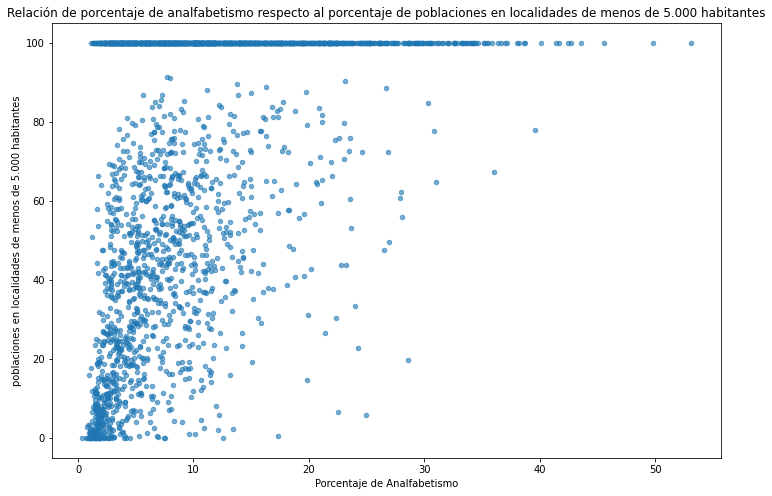

In [48]:
df_3.plot.scatter(
    x='ANALF',
    y='PL.5000',
    #s='REL',
    figsize=(12,8),
    alpha=0.6
)
plt.title('Relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5.000 habitantes')
plt.xlabel('Porcentaje de Analfabetismo')
plt.ylabel('poblaciones en localidades de menos de 5.000 habitantes')
plt.show()

**¿Existe una relación? ¿Cómo podrías analizar con que variable tiene más correlación el porcentaje de analfabetismo en personas mayores de 15 años?**

No existe una correlación fuerte entre el porcentaje de analfabetismo en personas mayores de 15 años respecto al porcentaje de poblaciones en localidades de menos de 5.000 habitantes.
La gráfica de dispersión no arroja información significante.

Para analizar con que variable tiene más correlación el porcentaje de analfabetismo se puede realizar una matriz de correlación asi:

<AxesSubplot:>

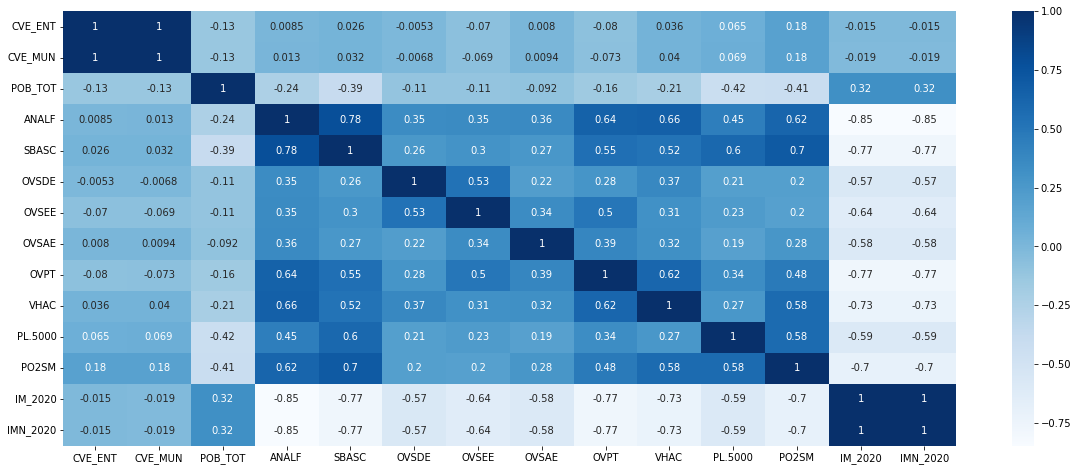

In [49]:
matriz_corr = data_original.corr()
plt.figure(figsize=(20,8))
sns.heatmap(matriz_corr, cmap="Blues", annot=True)

Según los valores de la matriz las variables `SBASC` (Porcentaje de población de 15 años o más sin educación básica), `OVPT` (Porcentaje de ocupantes en viviendas particulares habitadas con piso de tierra), `VHAC` (Porcentaje de viviendas particulares con hacinamiento) y `PO2SM` (Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos) tiene las correlaciones positivas más altas con el porcentaje de analfabetismo.

**Desarrollar un nuevo DataFrame con indicadores interesantes por Estado que se obtengan de los datos a nivel Municipal. Justifica las decisiones que tomes, y guarda el nuevo dataframe en formato parquet.**

In [50]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None) 

In [51]:
diccionario.head(18)

,Variable,Descripción
0,CVE_ENT,Clave de entidad federativa
1,NOM_ENT,Nombre de entidad federativa
2,CVE_MUN,Clave del municipio
3,NOM_MUN,Nombre del municipio
4,POB_TOT,Población total
5,ANALF,Porcentaje de población analfabeta de 15 años o más
6,SBASC,Porcentaje de población de 15 años o más sin educación básica
7,OVSDE,Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado
8,OVSEE,Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica
9,OVSAE,Porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada


In [52]:
nuevo_df = data_original.copy(deep=True)
nuevo_df[nuevo_df['NOM_ENT'] == 'Chiapas']

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
82,7,Chiapas,7001,Acacoyagua,17994,10.762105,51.759328,3.281789,1.707643,6.608077,4.071643,37.967793,55.029454,89.111184,53.290790,Medio,0.834460
83,7,Chiapas,7002,Acala,21187,15.883866,50.666667,2.065274,1.056321,3.415281,6.318981,45.663029,29.197149,85.024014,53.300950,Medio,0.834619
84,7,Chiapas,7003,Acapetahua,26899,13.733270,50.582072,2.881489,0.811003,16.664798,8.162350,29.858820,76.776088,88.608530,52.149949,Alto,0.816596
85,7,Chiapas,7004,Altamirano,36160,22.993684,62.952005,1.935814,3.607266,16.001023,7.584070,34.881321,70.636062,92.028986,49.784066,Alto,0.779549
86,7,Chiapas,7005,Amatán,24512,17.084370,52.222718,1.314496,4.594595,11.113841,25.741196,45.827438,100.000000,96.062176,48.759325,Alto,0.763503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,7,Chiapas,7121,Rincón Chamula San Pedro,8718,24.215071,71.467818,1.904106,0.906171,2.534985,24.787795,51.272335,22.780454,99.320815,49.862524,Alto,0.780778
202,7,Chiapas,7122,El Parral,15587,14.212513,51.368801,2.593641,1.654010,3.649118,6.003475,36.476952,23.339963,93.253573,53.500506,Medio,0.837743
203,7,Chiapas,7123,Emiliano Zapata,10783,13.133256,47.325895,2.691915,1.188156,8.159287,8.874037,35.661377,51.404989,84.696641,53.202082,Medio,0.833071
204,7,Chiapas,7124,Mezcalapa,23847,13.500735,53.409164,2.998102,3.516762,6.409445,15.732659,40.376640,66.586992,91.653269,51.298153,Alto,0.803258


In [53]:
nuevo_df.drop(columns=['CVE_MUN'], inplace=True)
nuevo_df.head(5)

,CVE_ENT,NOM_ENT,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


- count de municipios para determinar el numero total por estado.
- suma de población por municipio para conocer el total de habitantes por estado, asi como la media de habitantes por estado, su desviación estandar para ver qué tan dispersos están los datos alrededor de la media, y min max que indican el numero minimo y maximo de habitantes que tiene un determinado municipio del estado.
- para las variables porcentuales se promedian los porcentajes por municipio, se calcula su desviación estandar y su valor maximo y minimo, adicionalmente se calcula el numero de personas correspondiente a la media del porcentaje, para determinar la cantidad de personas equivalentes.
- Para las variables de indices de marginación (normalizado y no normalizado) se calcula la media de por municipio, asi como la desviación estandar y min max que indican el indice minimo y maximo de un determinado municipio del estado. No se calculó la suma total ya que son escalas de 0 a 100 o 0 a 1.
- El grado de marginación se determina con el valor más repetido por municipio de un estado (moda).

In [54]:
nuevo_df_2 = nuevo_df.groupby(['CVE_ENT', 'NOM_ENT']).agg(
    {
        'NOM_MUN': ['count'],
        'POB_TOT': ['sum', 'mean', 'std', 'min', 'max'],
        'ANALF': ['mean', 'std', 'min', 'max'],
        'SBASC': ['mean', 'std', 'min', 'max'],
        'OVSDE': ['mean', 'std', 'min', 'max'],
        'OVSEE': ['mean', 'std', 'min', 'max'],
        'OVSAE': ['mean', 'std', 'min', 'max'],
        'OVPT': ['mean', 'std', 'min', 'max'],
        'VHAC': ['mean', 'std', 'min', 'max'],
        'PL.5000': ['mean', 'std', 'min', 'max'],
        'PO2SM': ['mean', 'std', 'min', 'max'],
        'IM_2020': ['mean', 'std', 'min', 'max'],
        'IMN_2020': ['mean', 'std', 'min', 'max'],
        'GM_2020': [('mode', lambda x: x.mode())]
    }
)
nuevo_df_2.head(10)

NOM_MUN  POB_TOT                                \
                               count      sum           mean            std   
CVE_ENT NOM_ENT                                                               
1       Aguascalientes            11  1425607  129600.636364  273766.076707   
2       Baja California            6  3769020  628170.000000  730646.265845   
3       Baja California Sur        5   798447  159689.400000  150778.788022   
4       Campeche                  12   928363   77363.583333   93534.143085   
5       Coahuila de Zaragoza      38  3146771   82809.763158  181246.333932   
6       Colima                    10   731391   73139.100000   71801.918568   
7       Chiapas                  124  5543828   44708.290323   70345.134138   
8       Chihuahua                 67  3741869   55848.791045  215030.756103   
9       Ciudad de México          16  9209944  575621.500000  414344.170769   
10      Durango                   39  1832650   46991.025641  122567.179913   

                                                   ANALF                      \
                                 min      max       mean       std       min   
CVE_ENT NOM_ENT                                                                
1       Aguascalientes          9552   948990   3.118049  0.889846  1.644738   
2       Baja California       108440  1922523   2.912911  2.568740  1.469750   
3       Baja California Sur    18052   351111   2.870950  1.150278  1.783446   
4       Campeche                8683   294077   8.190987  2.747107  3.308902   
5       Coahuila de Zaragoza    1022   879958   2.871204  1.451521  1.185581   
6       Colima                  5623   191031   4.590371  2.247776  1.318632   
7       Chiapas                 2308   604147  16.402529  7.019412  3.768561   
8       Chihuahua                824  1512450   7.480793  8.490046  1.017294   
9       Ciudad de México      152685  1835486   1.421791  0.569976  0.353446   
10      Durango                 1633   688697   4.651446  3.566562  1.403445   

                                             SBASC                        \
                                    max       mean        std        min   
CVE_ENT NOM_ENT                                                            
1       Aguascalientes         4.491509  30.063087   6.001188  20.367220   
2       Baja California        8.122046  29.267552   9.226503  21.501444   
3       Baja California Sur    4.153327  27.156862   5.756375  19.888742   
4       Campeche              13.200431  34.836955   6.333700  22.971498   
5       Coahuila de Zaragoza   7.419899  30.418296   8.094200  16.410036   
6       Colima                 7.363070  34.022105   9.438551  16.655345   
7       Chiapas               40.108431  54.040591  11.523547  23.413125   
8       Chihuahua             45.522928  49.421664  14.910033  16.414407   
9       Ciudad de México       2.770224  17.150186   4.632670   5.535137   
10      Durango               22.869092  40.571062   8.969248  19.062776   

                                            OVSDE                       \
                                    max      mean        std       min   
CVE_ENT NOM_ENT                                                          
1       Aguascalientes        42.482450  1.056073   0.921527  0.104799   
2       Baja California       47.242461  0.305140   0.137859  0.155113   
3       Baja California Sur   33.588849  0.651467   0.358655  0.243318   
4       Campeche              44.089428  4.406495   2.699772  0.666552   
5       Coahuila de Zaragoza  50.038658  0.718646   0.655378  0.106026   
6       Colima                46.371851  0.598409   0.434066  0.069060   
7       Chiapas               86.142197  2.843284   4.468660  0.139139   
8       Chihuahua             84.480764  5.214129  10.371331  0.070578   
9       Ciudad de México      23.306375  0.073453   0.106528  0.007413   
10      Durango               58.931668  5.397567   6.729545  0.466705   

        

In [55]:
nuevo_df_3 = nuevo_df_2.reset_index()
nuevo_df_3.columns = ["_".join(pair) for pair in nuevo_df_3.columns]
nuevo_df_3.head(10)

,CVE_ENT_,NOM_ENT_,NOM_MUN_count,POB_TOT_sum,POB_TOT_mean,POB_TOT_std,POB_TOT_min,POB_TOT_max,ANALF_mean,ANALF_std,ANALF_min,ANALF_max,SBASC_mean,SBASC_std,SBASC_min,SBASC_max,OVSDE_mean,OVSDE_std,OVSDE_min,OVSDE_max,OVSEE_mean,OVSEE_std,OVSEE_min,OVSEE_max,OVSAE_mean,OVSAE_std,OVSAE_min,OVSAE_max,OVPT_mean,OVPT_std,OVPT_min,OVPT_max,VHAC_mean,VHAC_std,VHAC_min,VHAC_max,PL.5000_mean,PL.5000_std,PL.5000_min,PL.5000_max,PO2SM_mean,PO2SM_std,PO2SM_min,PO2SM_max,IM_2020_mean,IM_2020_std,IM_2020_min,IM_2020_max,IMN_2020_mean,IMN_2020_std,IMN_2020_min,IMN_2020_max,GM_2020_mode
0,1,Aguascalientes,11,1425607,129600.636364,273766.076707,9552,948990,3.118049,0.889846,1.644738,4.491509,30.063087,6.001188,20.367220,42.482450,1.056073,0.921527,0.104799,2.650373,0.530232,0.259375,0.113169,1.030523,0.969273,0.446016,0.378610,1.781333,1.074021,0.314365,0.591434,1.452547,19.687025,3.748914,10.339530,22.985739,49.606161,21.437100,7.523683,78.221049,71.460700,9.531334,54.226594,81.726369,57.778190,1.213338,56.546071,60.318795,0.904726,0.018999,0.885433,0.944508,Muy bajo
1,2,Baja California,6,3769020,628170.000000,730646.265845,108440,1922523,2.912911,2.568740,1.469750,8.122046,29.267552,9.226503,21.501444,47.242461,0.305140,0.137859,0.155113,0.523168,1.483801,2.014940,0.184237,5.493985,5.243821,5.929677,0.676314,16.807641,2.308207,1.155209,1.226287,4.436872,16.978084,6.975476,12.588088,31.074457,19.537877,18.167443,1.704115,54.398306,72.750087,4.612197,65.782431,79.431857,57.781341,2.206548,53.399040,59.384989,0.904775,0.034551,0.836155,0.929886,Muy bajo
2,3,Baja California Sur,5,798447,159689.400000,150778.788022,18052,351111,2.870950,1.150278,1.783446,4.153327,27.156862,5.756375,19.888742,33.588849,0.651467,0.358655,0.243318,1.037092,1.184910,0.616186,0.584838,2.176596,3.799233,3.117819,1.552196,9.289442,4.087029,2.459098,2.106201,8.351669,18.653066,4.832217,11.964861,24.588451,16.375115,14.073311,3.455318,39.317735,52.213047,9.351773,38.138780,62.554511,58.632937,0.861853,57.492567,59.853253,0.918110,0.013495,0.900254,0.937219,Muy bajo
3,4,Campeche,12,928363,77363.583333,93534.143085,8683,294077,8.190987,2.747107,3.308902,13.200431,34.836955,6.333700,22.971498,44.089428,4.406495,2.699772,0.666552,8.648885,1.530167,1.799409,0.340677,6.980429,6.267697,7.202973,0.655017,21.902536,3.487182,2.987893,0.825039,9.935887,34.484602,6.024477,24.155493,46.496258,49.136529,29.522856,9.925292,100.000000,79.987263,9.640516,55.028952,89.483964,54.681047,2.496856,50.513936,58.640701,0.856229,0.039097,0.790978,0.918232,Bajo
4,5,Coahuila de Zaragoza,38,3146771,82809.763158,181246.333932,1022,879958,2.871204,1.451521,1.185581,7.419899,30.418296,8.094200,16.410036,50.038658,0.718646,0.655378,0.106026,3.073556,0.471772,0.713606,0.000000,3.702924,1.602855,2.131022,0.080939,9.832397,0.765852,0.539600,0.000000,2.211803,16.464859,3.116461,8.839779,22.912317,46.994557,43.091836,0.328639,100.000000,70.690121,12.407243,46.297062,93.679858,58.047215,1.616921,54.858829,60.737504,0.908939,0.025319,0.859013,0.951065,Muy bajo
5,6,Colima,10,731391,73139.100000,71801.918568,5623,191031,4.590371,2.247776,1.318632,7.363070,34.022105,9.438551,16.655345,46.371851,0.598409,0.434066,0.069060,1.305903,0.570229,0.376797,0.160246,1.240572,1.089938,0.661636,0.158905,2.223104,3.721316,2.192757,0.978966,7.334526,17.792644,4.299337,10.228133,22.907663,33.664786,29.532346,1.513067,100.000000,67.009430,10.137892,50.694127,83.404586,57.850664,1.706150,55.028976,60.512092,0.905861,0.026716,0.861677,0.947535,Muy bajo
6,7,Chiapas,124,5543828,44708.290323,70345.134138,2308,604147,16.402529,7.019412,3.768561,40.108431,54.040591,11.523547,23.413125,86.142197,2.843284,4.468660,0.139139,45.439792,1.759358,1.730764,0.238191,11.557973,10.512035,10.265876,0.203540,70.051123,13.543120,7.923391,1.956272,41.197736,41.149652,9.262013,21.374489,63.512249,75.256678,25.483866,1.597459,100.000000,91.050633,6.032302,69.091456,99.320815,51.026488,3.254427,35.901730,58.345897,0.799004,0.050960,0.562171,0.913616,Alt

In [56]:
# calcular el numero de personas correspondiente a la suma del porcentaje de cada estado.

poblacion_estado = nuevo_df_3['POB_TOT_sum']

for col in nuevo_df_3.columns[8:]:
    if col[-4:] == 'mean':
        name = col.partition("_")[0]
        nuevo_df_3[name+'_POB'] = ((nuevo_df_3[col] * poblacion_estado)/100).round()
        print('check')

check
check
check
check
check
check
check
check
check
check
check


In [57]:
nuevo_df_3.head(10)

,CVE_ENT_,NOM_ENT_,NOM_MUN_count,POB_TOT_sum,POB_TOT_mean,POB_TOT_std,POB_TOT_min,POB_TOT_max,ANALF_mean,ANALF_std,ANALF_min,ANALF_max,SBASC_mean,SBASC_std,SBASC_min,SBASC_max,OVSDE_mean,OVSDE_std,OVSDE_min,OVSDE_max,OVSEE_mean,OVSEE_std,OVSEE_min,OVSEE_max,OVSAE_mean,OVSAE_std,OVSAE_min,OVSAE_max,OVPT_mean,OVPT_std,OVPT_min,OVPT_max,VHAC_mean,VHAC_std,VHAC_min,VHAC_max,PL.5000_mean,PL.5000_std,PL.5000_min,PL.5000_max,PO2SM_mean,PO2SM_std,PO2SM_min,PO2SM_max,IM_2020_mean,IM_2020_std,IM_2020_min,IM_2020_max,IMN_2020_mean,IMN_2020_std,IMN_2020_min,IMN_2020_max,GM_2020_mode,ANALF_POB,SBASC_POB,OVSDE_POB,OVSEE_POB,OVSAE_POB,OVPT_POB,VHAC_POB,PL.5000_POB,PO2SM_POB,IM_POB,IMN_POB
0,1,Aguascalientes,11,1425607,129600.636364,273766.076707,9552,948990,3.118049,0.889846,1.644738,4.491509,30.063087,6.001188,20.367220,42.482450,1.056073,0.921527,0.104799,2.650373,0.530232,0.259375,0.113169,1.030523,0.969273,0.446016,0.378610,1.781333,1.074021,0.314365,0.591434,1.452547,19.687025,3.748914,10.339530,22.985739,49.606161,21.437100,7.523683,78.221049,71.460700,9.531334,54.226594,81.726369,57.778190,1.213338,56.546071,60.318795,0.904726,0.018999,0.885433,0.944508,Muy bajo,44451.0,428581.0,15055.0,7559.0,13818.0,15311.0,280660.0,707189.0,1018749.0,823690.0,12898.0
1,2,Baja California,6,3769020,628170.000000,730646.265845,108440,1922523,2.912911,2.568740,1.469750,8.122046,29.267552,9.226503,21.501444,47.242461,0.305140,0.137859,0.155113,0.523168,1.483801,2.014940,0.184237,5.493985,5.243821,5.929677,0.676314,16.807641,2.308207,1.155209,1.226287,4.436872,16.978084,6.975476,12.588088,31.074457,19.537877,18.167443,1.704115,54.398306,72.750087,4.612197,65.782431,79.431857,57.781341,2.206548,53.399040,59.384989,0.904775,0.034551,0.836155,0.929886,Muy bajo,109788.0,1103100.0,11501.0,55925.0,197641.0,86997.0,639907.0,736386.0,2741965.0,2177790.0,34101.0
2,3,Baja California Sur,5,798447,159689.400000,150778.788022,18052,351111,2.870950,1.150278,1.783446,4.153327,27.156862,5.756375,19.888742,33.588849,0.651467,0.358655,0.243318,1.037092,1.184910,0.616186,0.584838,2.176596,3.799233,3.117819,1.552196,9.289442,4.087029,2.459098,2.106201,8.351669,18.653066,4.832217,11.964861,24.588451,16.375115,14.073311,3.455318,39.317735,52.213047,9.351773,38.138780,62.554511,58.632937,0.861853,57.492567,59.853253,0.918110,0.013495,0.900254,0.937219,Muy bajo,22923.0,216833.0,5202.0,9461.0,30335.0,32633.0,148935.0,130747.0,416894.0,468153.0,7331.0
3,4,Campeche,12,928363,77363.583333,93534.143085,8683,294077,8.190987,2.747107,3.308902,13.200431,34.836955,6.333700,22.971498,44.089428,4.406495,2.699772,0.666552,8.648885,1.530167,1.799409,0.340677,6.980429,6.267697,7.202973,0.655017,21.902536,3.487182,2.987893,0.825039,9.935887,34.484602,6.024477,24.155493,46.496258,49.136529,29.522856,9.925292,100.000000,79.987263,9.640516,55.028952,89.483964,54.681047,2.496856,50.513936,58.640701,0.856229,0.039097,0.790978,0.918232,Bajo,76042.0,323413.0,40908.0,14206.0,58187.0,32374.0,320142.0,456165.0,742572.0,507639.0,7949.0
4,5,Coahuila de Zaragoza,38,3146771,82809.763158,181246.333932,1022,879958,2.871204,1.451521,1.185581,7.419899,30.418296,8.094200,16.410036,50.038658,0.718646,0.655378,0.106026,3.073556,0.471772,0.713606,0.000000,3.702924,1.602855,2.131022,0.080939,9.832397,0.765852,0.539600,0.000000,2.211803,16.464859,3.116461,8.839779,22.912317,46.994557,43.091836,0.328639,100.000000,70.690121,12.407243,46.297062,93.679858,58.047215,1.616921,54.858829,60.737504,0.908939,0.025319,0.859013,0.951065,Muy bajo,90350.0,957194.0,22614.0,14846.0,50438.0,24100.0,518111.0,1478811.0,2224456.0,1826613.0,28602.0
5,6,Colima,10,731391,73139.100000,71801.918568,5623,191031,4.590371,2.247776,1.318632,7.363070,34.022105,9.438551,16.655345,46.371851,0.598409,0.434066,0.069060,1.305903,0.570229,0.376797,0.160246,1.240572,1.089938,0.661636,0.158905,2.223104,3.721316,2.192757,0.978966,7.334526,17.792644,4.299337,10.228133,22.907663,33.664786,29.532346,1.513067,100.000000,67.009430,10.137892,50.694127,83.4045

In [58]:
# Guardar el archivo en formato parquet
nuevo_df_3.to_parquet('final_data.parquet.gzip', compression='gzip')